# Libraries

In [29]:
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction as GC, molecular_weight as MW, MeltingTemp as MT

# Data

### SeqA

In [30]:
sequence = SeqIO.read('x.fasta', 'fasta')
SeqX = sequence.seq
SeqX

Seq('CTAACCCCTAACCCCTAACCCCTAACCCCTAACCCTAACCCTAACCCCTAACCC...GGT')

### SeqB

In [31]:
sequence2 = SeqIO.read('y3.fasta', 'fasta')
SeqY = sequence2.seq
SeqY

Seq('ACCCCTAACCCCTAACCCTAACCCTAACCCTAACCCCTAAACCCCTAACCCCTA...GGT')

### Simpler Sequence Karena Quiznya dikit

In [32]:
sequences = SeqIO.read('sequence.fasta', 'fasta')
SeqX = Seq('AAGCTTAGCTAGAGCAGTCAGCTAGCTAGCT')
SeqY = Seq('GTGTTAGTGCGCTAGTGCTGACTAGGTACAGTAGCTAGTTACTAG')

# Quiz

## 1. Sequence Manipulation:

### Display the total length of Sequence X and Y.

In [33]:
print(f"Length of Sequence X: {len(SeqX)}")
print(f"Length of Sequence Y: {len(SeqY)}")

Length of Sequence X: 31
Length of Sequence Y: 45


### Display which index the first time the codon (CGC) appears in Sequence X and Y.

In [34]:
print(f"First time codon CGC appear in SeqX: {SeqX.find('CGC')}")
print(f"First time codon CGC appear in SeqY: {SeqY.find('CGC')}")

First time codon CGC appear in SeqX: -1
First time codon CGC appear in SeqY: 9


### Create New Sequence By:

#### Take the first 10 Nucleotides from SequenceX and the last 5 Nucleotides from Sequence X

In [35]:
SeqX1 = SeqX[:10]
SeqX2 = SeqX[-5:]

#### Take the first 20 nucleotides from Sequence Y and the last 3 nucleotides from Sequence Y.

In [36]:
SeqY1 = SeqY[:20]
SeqY2 = SeqY[-3:]

### Combine both of the string above and reverse it to a new sequence, Sequence Z.

In [37]:
SeqZ = SeqX1 + SeqX2 + SeqY1 + SeqY2
SeqZ = SeqZ[::-1]

## 2.	Sequence Analysis & Plotting

### Display the nucleotides base (A and C) frequency for Sequence Z with a chart using matplotlib library. You are free to plot using bar or pie chart.

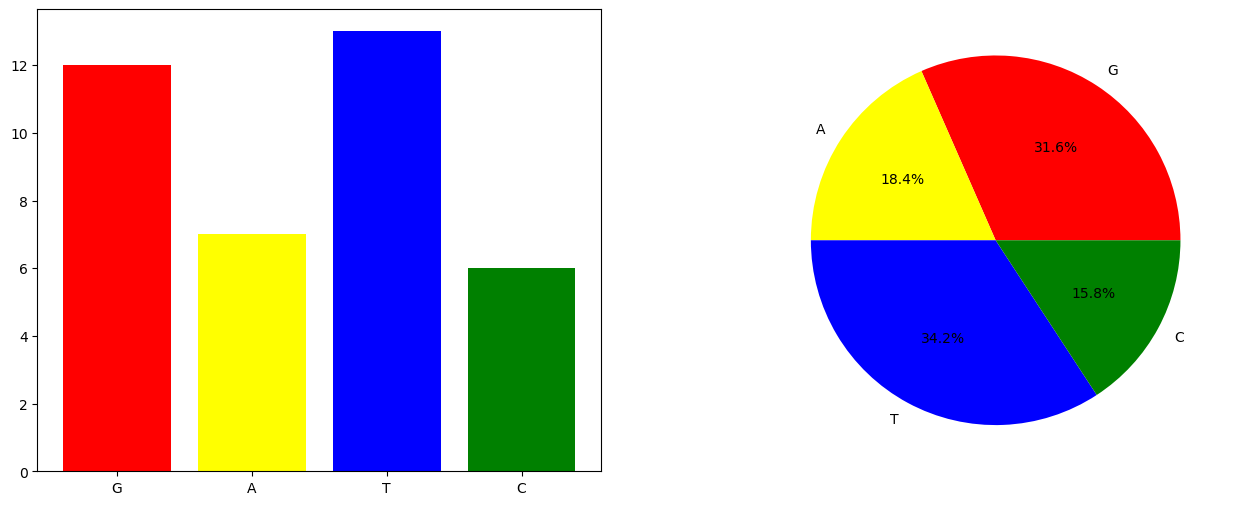

In [38]:
from collections import Counter
import matplotlib.pyplot as plt
CounterZ = Counter(SeqZ)
valuesZ = CounterZ.values()
keysZ = CounterZ.keys()
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
colors = ['red', 'yellow', 'blue', 'green']
ax[0].bar(keysZ, valuesZ, color = colors)
ax[1].pie(valuesZ, labels = keysZ, colors = colors, autopct = '%1.1f%%')
plt.show()

### Display GC and AT content percentage for Sequence Z

GC Content: 47.368421052631575
AC Content: 52.631578947368425


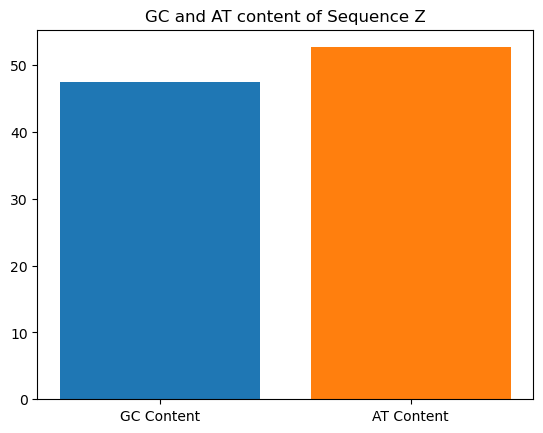

In [39]:
from Bio.SeqUtils import gc_fraction as GC
gcZ = GC(SeqZ) * 100
atZ = 100 - gcZ
print(f"GC Content: {gcZ}")
print(f"AC Content: {atZ}")
plt.bar('GC Content', gcZ)
plt.bar('AT Content', atZ)
plt.title('GC and AT content of Sequence Z')
plt.show()

### Display melting temperature for Sequence Z using Wallace method.

In [40]:
print(f"Melting Temperature for Sequence Z (Wallace: {MT.Tm_Wallace(SeqZ)}")
print(f"Melting Temperature for Sequence Z (NN: {MT.Tm_NN(SeqZ)}")
print(f"Melting Temperature for Sequence Z (GC: {MT.Tm_GC(SeqZ)}")

Melting Temperature for Sequence Z (Wallace: 112.0
Melting Temperature for Sequence Z (NN: 66.01161695590775
Melting Temperature for Sequence Z (GC: 63.53448101934633


### Display Molecular Weight for Sequence Z

In [41]:
print(f"Molecular Weight for Sequence Z: {MW(SeqZ)}")

Molecular Weight for Sequence Z: 11850.533999999998


## 3.	DNA and mRNA Protein Synthesis:

### Transcribe and display the DNA sequence Z into MRNA Sequence

In [42]:
print(f"mRNA Sequence of Sequence Z: {SeqZ.transcribe()}")

mRNA Sequence of Sequence Z: GAUGUCGUGAUCGCGUGAUUGUGUCGAUUCGAUUCGAA


### Translate and display the mRNA sequence Z into amino acids Sequence

In [43]:
print(f"Amino Acid Sequence of Sequence Z: {SeqZ.translate()}")

Amino Acid Sequence of Sequence Z: DVVIA*LCRFDS


c:\Users\user\anaconda3\Lib\site-packages\Bio\Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


## 4.	Sequence Alginment & Similarities:

### Perform local alignment pairwise between Sequence X and Sequence Y and display alignment score

In [44]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [45]:
local_alignment = pairwise2.align.localxx(SeqX, SeqY)
for align in local_alignment:
    print(format_alignment(*align))

3 GCT-T-AG--C--TAGA-GC--A---G-T-CAGCTAGCTAG---CT
  | | | ||  |  |||  ||  |   | | ||| |||||||   ||
1 G-TGTTAGTGCGCTAG-TGCTGACTAGGTACAG-TAGCTAGTTACT
  Score=26

3 GCT--TAG--C--TAGA-GC--A---G-T-CAGCTAGCTAG---CT
  | |  |||  |  |||  ||  |   | | ||| |||||||   ||
1 G-TGTTAGTGCGCTAG-TGCTGACTAGGTACAG-TAGCTAGTTACT
  Score=26

3 GC--TTAG--C--TAGA-GC--A---G-T-CAGCTAGCTAG---CT
  |   ||||  |  |||  ||  |   | | ||| |||||||   ||
1 G-TGTTAGTGCGCTAG-TGCTGACTAGGTACAG-TAGCTAGTTACT
  Score=26

3 GC-TTAG--C--TAGA-GC--A---G-T-CAGCTAGCTAG---CT
  |. ||||  |  |||  ||  |   | | ||| |||||||   ||
1 GTGTTAGTGCGCTAG-TGCTGACTAGGTACAG-TAGCTAGTTACT
  Score=26

3 G-CTTAG--C--TAGA-GC--A---G-T-CAGCTAGCTAG---CT
  | .||||  |  |||  ||  |   | | ||| |||||||   ||
1 GTGTTAGTGCGCTAG-TGCTGACTAGGTACAG-TAGCTAGTTACT
  Score=26

3 GCTTAG--C--TAGA-GC--A---G-T-CAGCTAGCTAG---CT
  | ||||  |  |||  ||  |   | | ||| |||||||   ||
3 G-TTAGTGCGCTAG-TGCTGACTAGGTACAG-TAGCTAGTTACT
  Score=26

3 GCT-T-A--GC--TAGA-GC--A---G-T-CAGCTAGCTAG---CT
  | | | |

### Perform global alignment pairwise between Sequence X and Sequence Y and display alignment score

In [46]:
global_alignment = pairwise2.align.globalxx(SeqX, SeqY)
for align in global_alignment:
    print(format_alignment(*align))

AAGCT-T-AG--C--TAGA-GC--A---G-T-CAGCTAGCTAG---CT--
  | | | ||  |  |||  ||  |   | | ||| |||||||   ||  
--G-TGTTAGTGCGCTAG-TGCTGACTAGGTACAG-TAGCTAGTTACTAG
  Score=26

AAGCT--TAG--C--TAGA-GC--A---G-T-CAGCTAGCTAG---CT--
  | |  |||  |  |||  ||  |   | | ||| |||||||   ||  
--G-TGTTAGTGCGCTAG-TGCTGACTAGGTACAG-TAGCTAGTTACTAG
  Score=26

AAGC--TTAG--C--TAGA-GC--A---G-T-CAGCTAGCTAG---CT--
  |   ||||  |  |||  ||  |   | | ||| |||||||   ||  
--G-TGTTAGTGCGCTAG-TGCTGACTAGGTACAG-TAGCTAGTTACTAG
  Score=26

AAGC-TTAG--C--TAGA-GC--A---G-T-CAGCTAGCTAG---CT--
  |. ||||  |  |||  ||  |   | | ||| |||||||   ||  
--GTGTTAGTGCGCTAG-TGCTGACTAGGTACAG-TAGCTAGTTACTAG
  Score=26

AAG-CTTAG--C--TAGA-GC--A---G-T-CAGCTAGCTAG---CT--
  | .||||  |  |||  ||  |   | | ||| |||||||   ||  
--GTGTTAGTGCGCTAG-TGCTGACTAGGTACAG-TAGCTAGTTACTAG
  Score=26

AA--GCTTAG--C--TAGA-GC--A---G-T-CAGCTAGCTAG---CT--
    | ||||  |  |||  ||  |   | | ||| |||||||   ||  
--GTG-TTAGTGCGCTAG-TGCTGACTAGGTACAG-TAGCTAGTTACTAG
  Score=26

AA-GCTTAG--C--TA

### Find and display Hamming and Levenshtein distance between X and Y

In [47]:
def hamming(SeqX, SeqY):
    h = 0
    for x, y in zip(SeqX, SeqY):
        if x != y:
            h+=1 
    print(f"Hamming distance of SeqX and SeqY: {h}")


In [48]:
hamming(SeqX, SeqY)

Hamming distance of SeqX and SeqY: 22


In [49]:
from Levenshtein import distance
print(f"Levenshtein distance of SeqX and SeqY: {distance(SeqX, SeqY)}")

Levenshtein distance of SeqX and SeqY: 21


## Dotplus

In [50]:
def pair(a, b):
    return True if a == b else False

In [51]:
def create_matrix(SeqA, SeqB):
    matrix = []
    for x in SeqA:
        row = []
        for y in SeqB:
            row.append(pair(x,y))
        matrix.append(row)
    return matrix

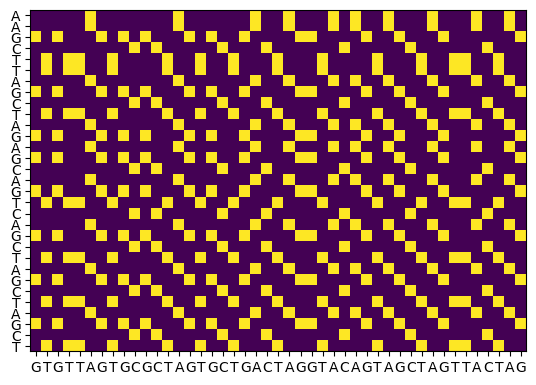

In [52]:
import numpy as np
plt.imshow(np.array(create_matrix(SeqX, SeqY)))
plt.yticks(np.arange(len(SeqX)), SeqX)
plt.xticks(np.arange(len(SeqY)), SeqY)
plt.show()

In [53]:
def dot_plus(SeqX, SeqY):
    print(' |' + SeqY)
    print('-' * (len(SeqY) + 2))
    for x in SeqX:
        print(x + '|', end='')
        for y in SeqY:
            print('X' if x == y else ' ', end='')
        print('')
dot_plus(SeqX, SeqY)

 |GTGTTAGTGCGCTAGTGCTGACTAGGTACAGTAGCTAGTTACTAG
-----------------------------------------------
A|     X       X      X  X   X X  X   X   X  X 
A|     X       X      X  X   X X  X   X   X  X 
G|X X   X X X   X X  X    XX    X  X   X      X
C|         X X     X   X      X     X      X   
T| X XX  X    X  X  X   X   X    X   X  XX  X  
T| X XX  X    X  X  X   X   X    X   X  XX  X  
A|     X       X      X  X   X X  X   X   X  X 
G|X X   X X X   X X  X    XX    X  X   X      X
C|         X X     X   X      X     X      X   
T| X XX  X    X  X  X   X   X    X   X  XX  X  
A|     X       X      X  X   X X  X   X   X  X 
G|X X   X X X   X X  X    XX    X  X   X      X
A|     X       X      X  X   X X  X   X   X  X 
G|X X   X X X   X X  X    XX    X  X   X      X
C|         X X     X   X      X     X      X   
A|     X       X      X  X   X X  X   X   X  X 
G|X X   X X X   X X  X    XX    X  X   X      X
T| X XX  X    X  X  X   X   X    X   X  XX  X  
C|         X X     X   X      X     X   